In [161]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [162]:
with np.load('prediction-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    data_y = fh['data_y']
    test_x = fh['test_x']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER
# 2. INDEX: COLOR CHANNEL
# 3/4. INDEX: PIXEL VALUE
print(data_x.shape, data_x.dtype)
print(data_y.shape, data_y.dtype)

data_x_2 = data_x/data_x.max()
data_x_norm = data_x_2-data_x_2.mean()/data_x_2.std()

# TEST DATA: INPUT (x) ONLY
print(test_x.shape, test_x.dtype)
test_x_2 = test_x/test_x.max()
test_x_norm = test_x_2-test_x_2.mean()/test_x_2.std()

(20000, 1, 28, 28) float32
(20000,) int64
(2000, 1, 28, 28) float32


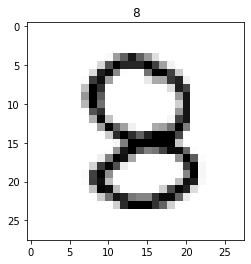

In [163]:
plt.imshow(data_x[0, 0],cmap='gray_r')
plt.title(data_y[0])
plt.show()

In [164]:
images = torch.tensor(data_x_norm)
labels = torch.tensor(data_y)
#we create a dataset we can work with
dataset = TensorDataset(images,labels)

#we divide into training and validation set
train_set, val_set = torch.utils.data.random_split(dataset, [17500, 2500])
#normalize the values
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=True)

#create test dataset
images_test = torch.tensor(test_x_norm)
test_set = TensorDataset(images_test)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

In [165]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

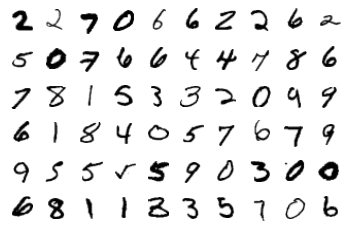

In [166]:
#Displays the first 60 images
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [167]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [168]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [169]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-2.2232e-04, -2.2232e-04, -2.2232e-04,  ..., -2.2232e-04,
         -2.2232e-04, -2.2232e-04],
        [-5.0780e-04, -5.0780e-04, -5.0780e-04,  ..., -5.0780e-04,
         -5.0780e-04, -5.0780e-04],
        [-6.5311e-04, -6.5311e-04, -6.5311e-04,  ..., -6.5311e-04,
         -6.5311e-04, -6.5311e-04],
        ...,
        [-3.9944e-05, -3.9944e-05, -3.9944e-05,  ..., -3.9944e-05,
         -3.9944e-05, -3.9944e-05],
        [ 3.8908e-04,  3.8908e-04,  3.8908e-04,  ...,  3.8908e-04,
          3.8908e-04,  3.8908e-04],
        [ 1.1342e-03,  1.1342e-03,  1.1342e-03,  ...,  1.1342e-03,
          1.1342e-03,  1.1342e-03]])


In [170]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
time0 = time()
epochs = 30
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        labels = labels.long()
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e+1, running_loss/len(trainloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 1 - Training loss: 1.0329126654206402
Epoch 2 - Training loss: 0.3665477919535045
Epoch 3 - Training loss: 0.2882328962322569
Epoch 4 - Training loss: 0.2446148413756903
Epoch 5 - Training loss: 0.21239355580378189
Epoch 6 - Training loss: 0.17453300992339632
Epoch 7 - Training loss: 0.15067919423246254
Epoch 8 - Training loss: 0.13224325626816627
Epoch 9 - Training loss: 0.11538111774699532
Epoch 10 - Training loss: 0.1044852940916308
Epoch 11 - Training loss: 0.0924465103979039
Epoch 12 - Training loss: 0.08205653467371951
Epoch 13 - Training loss: 0.06870937235585421
Epoch 14 - Training loss: 0.061451569716208174
Epoch 15 - Training loss: 0.05739842234757205
Epoch 16 - Training loss: 0.045128227082373455
Epoch 17 - Training loss: 0.041561971453399175
Epoch 18 - Training loss: 0.036563873330953726
Epoch 19 - Training loss: 0.03074173238060444
Epoch 20 - Training loss: 0.02616222334998476
Epoch 21 - Training loss: 0.023079874526784096
Epoch 22 - Training loss: 0.0211328341435287

In [171]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 2500

Model Accuracy = 0.958


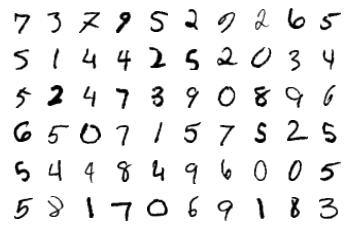

In [172]:
#prediction for the test set
figure = plt.figure()
num_of_images = 60
for index in range(1,num_of_images+1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(test_x[index,0], cmap='gray_r')

In [173]:
prediction = []
for images_test in testloader:
  for i in range(len(images_test[0])):
    img = images_test[0][i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    prediction.append(pred_label)


In [174]:
prediction = np.array(prediction)
print(len(prediction))

2000


In [175]:
prediction[1:61]

array([7, 3, 3, 9, 5, 2, 7, 2, 6, 5, 5, 1, 4, 4, 2, 5, 2, 0, 3, 4, 9, 2,
       4, 7, 3, 9, 0, 8, 9, 6, 6, 5, 0, 7, 1, 5, 7, 5, 2, 5, 5, 4, 9, 8,
       4, 9, 6, 0, 0, 5, 5, 8, 1, 7, 0, 6, 9, 1, 8, 3])